In [51]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df.model.unique()

array(['mt0-small', 'mt0-xl', 'mt0-base', 'mt0-large', 'mt0-xxl',
       'bloomz-560m', 'bloomz-1b1', 'bloomz-1b7', 'bloomz-3b',
       'bloomz-7b1', 'bactrian-x-bloom-7b1-lora',
       'bactrian-id-bloom-7b1-lora', 'sealion7b', 'SeaLLM-7B-Chat',
       'Llama-2-7b-chat-hf', 'Merak-7B-v4', 'Llama-2-13b-chat-hf'],
      dtype=object)

In [73]:
dfs = []
for path in glob.glob('metrics_nlu_ext/*'):
    model = path.split('ext_nlu_results_')[-1][:-4].split('_')[-1]
    df = pd.read_csv(path)
    df['model'] = model
    dfs.append(df)
df = pd.concat(dfs)

Merak-7B-v4
    index         dataset  prompt_id prompt_lang  accuracy  micro_prec  \
0       0            MAPS          0         eng  0.777126    0.777126   
1       1            MAPS          1         eng  0.797654    0.797654   
2       2            MAPS          2         eng  0.768328    0.768328   
3       3            MAPS          3         eng  0.777126    0.777126   
4       4   haryoaw/COPAL          0         eng  0.563506    0.563506   
5       5   haryoaw/COPAL          1         eng  0.592129    0.592129   
6       6   haryoaw/COPAL          2         eng  0.563506    0.563506   
7       7   haryoaw/COPAL          3         eng  0.559928    0.559928   
8       8         MABL/id          0         eng  0.648246    0.648246   
9       9         MABL/id          1         eng  0.639474    0.639474   
10     10         MABL/id          2         eng  0.651754    0.651754   
11     11         MABL/id          3         eng  0.633333    0.633333   
12     12         MABL/jv 

MAPS


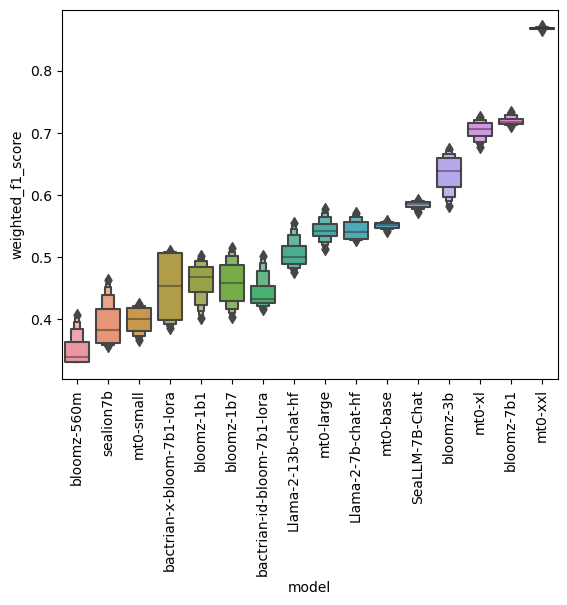

haryoaw/COPAL


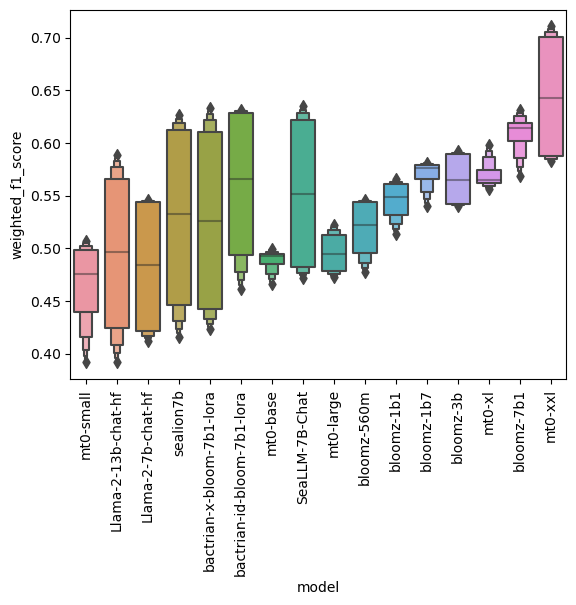

MABL/id


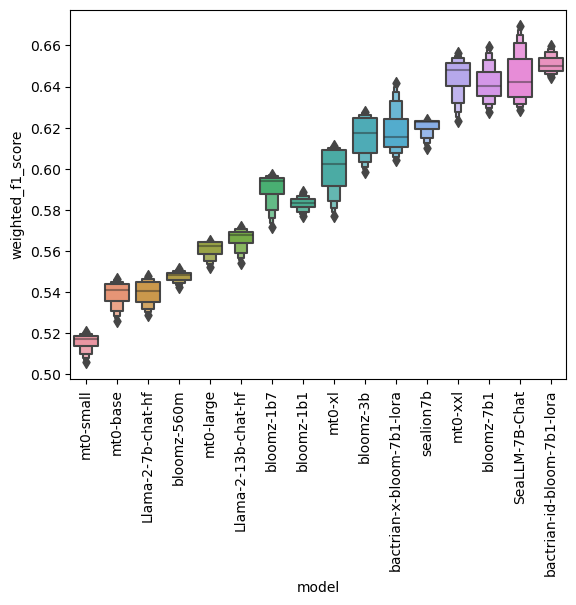

MABL/jv


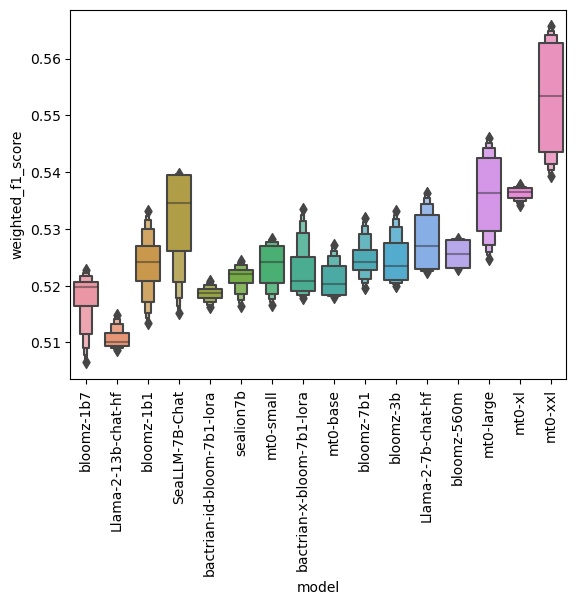

MABL/su


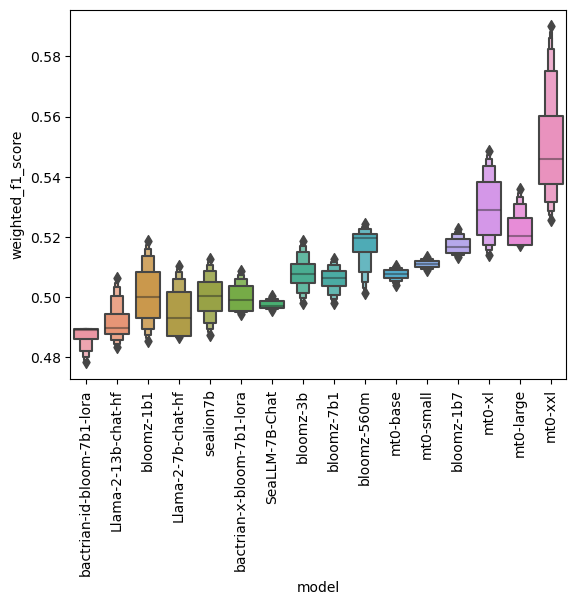

IndoStoryCloze


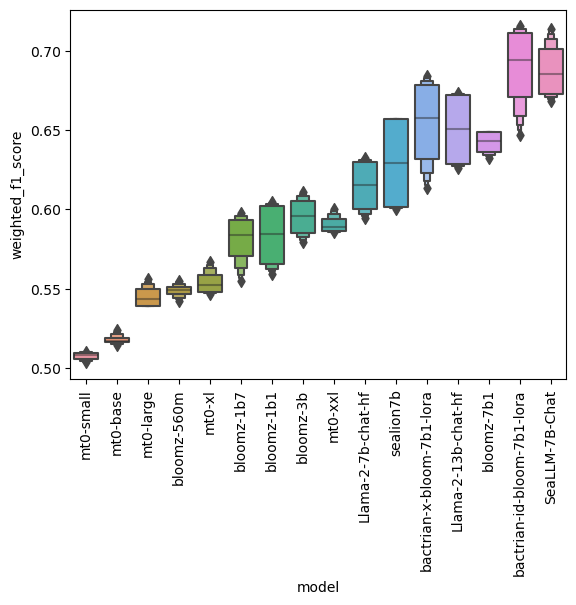

IndoMMLU


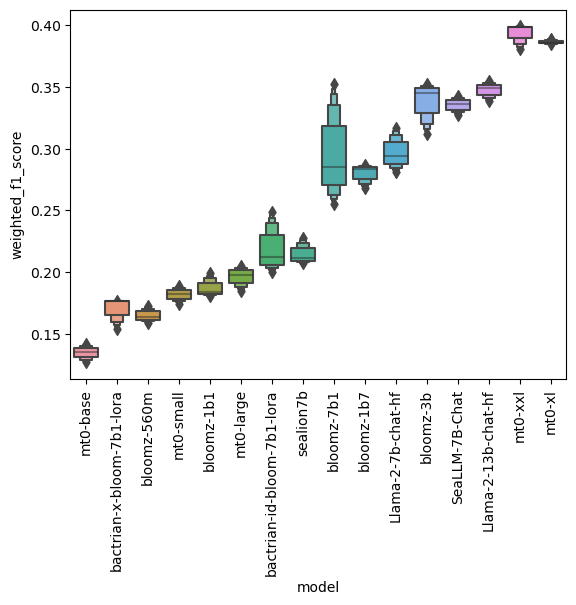

In [62]:
# Ind
for dataset in df['dataset'].unique():
    print(dataset)
    sns.boxenplot(
        data=df.loc[(df['prompt_lang'] == 'ind') & (df['dataset'] == dataset),:].sort_values('weighted_f1_score').reset_index(drop=True),
        x='model', y='weighted_f1_score', k_depth=7, dodge=True
    )
    plt.xticks(rotation=90)
    plt.show()

MAPS


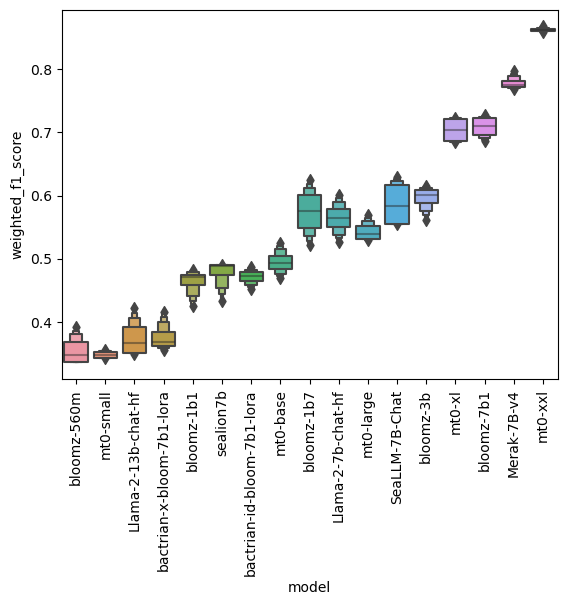

haryoaw/COPAL


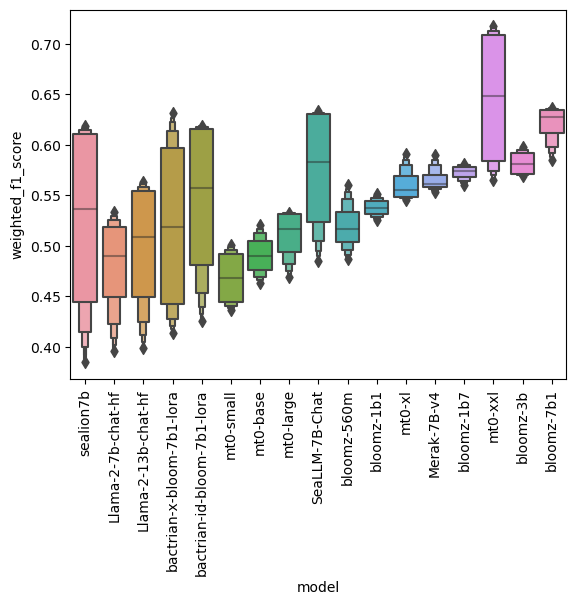

MABL/id


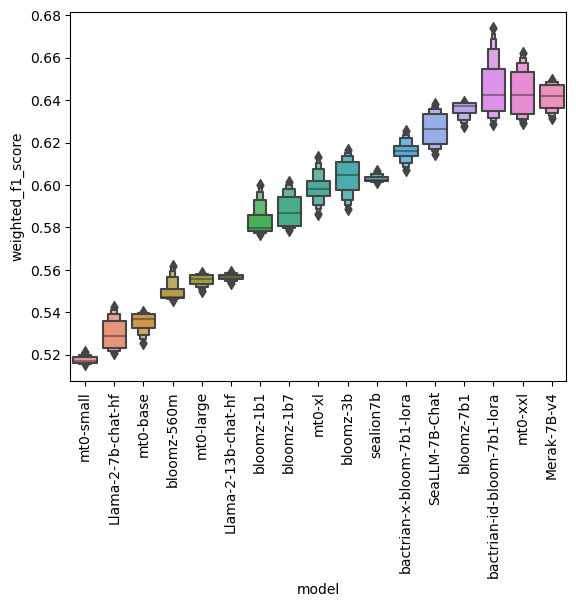

MABL/jv


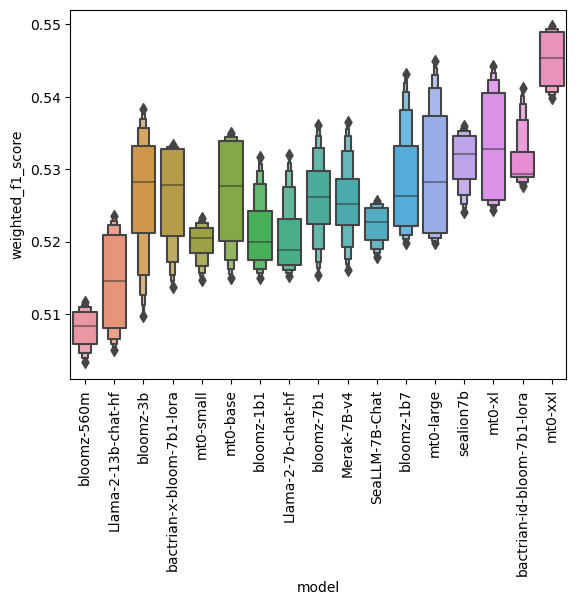

MABL/su


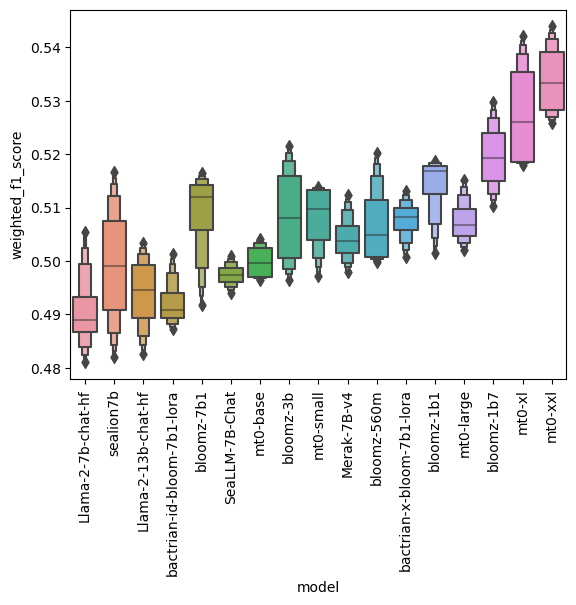

IndoStoryCloze


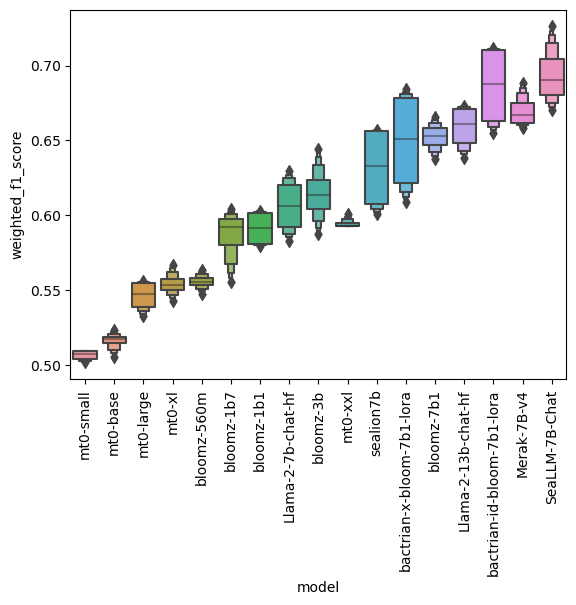

IndoMMLU


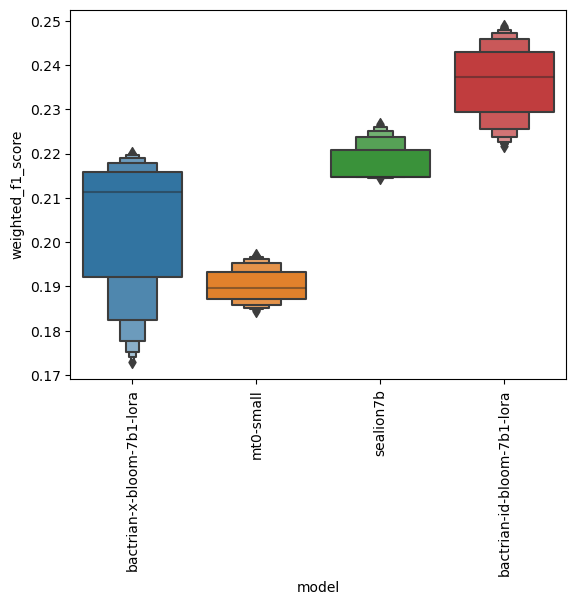

In [74]:
# Eng
for dataset in df['dataset'].unique():
    print(dataset)
    sns.boxenplot(
        data=df.loc[(df['prompt_lang'] == 'eng') & (df['dataset'] == dataset),:].sort_values('weighted_f1_score').reset_index(drop=True),
        x='model', y='weighted_f1_score', k_depth=7, dodge=True
    )
    plt.xticks(rotation=90)
    plt.show()